In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
train = pd.read_csv('train.csv')
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test=pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# put labels into y_train variable
Y_train=train["label"]
# Drop 'label' column
X_train=train.drop(labels = ["label"],axis=1)
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

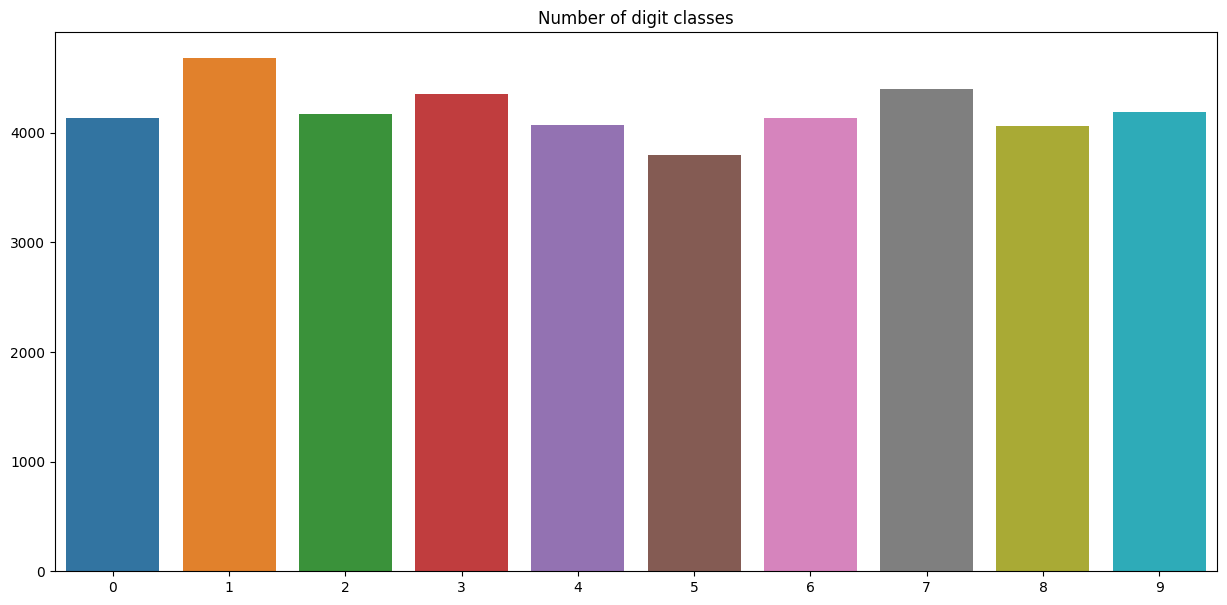

In [5]:
plt.figure(figsize=(15,7))
g=sns.barplot(x=Y_train.value_counts().index,y=Y_train.value_counts().values)
plt.title("Number of digit classes")

plt.show()


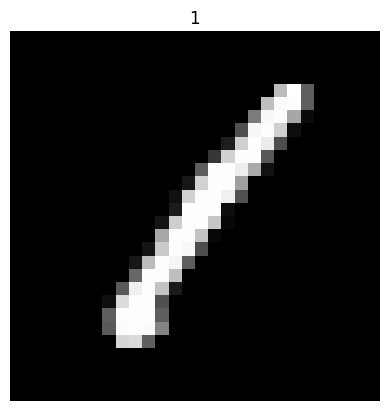

In [6]:
# Plotting X_train 0th record pixels which is 1 in this case
img=X_train.iloc[0].values
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(Y_train.iloc[0])
plt.axis("off")
plt.show()

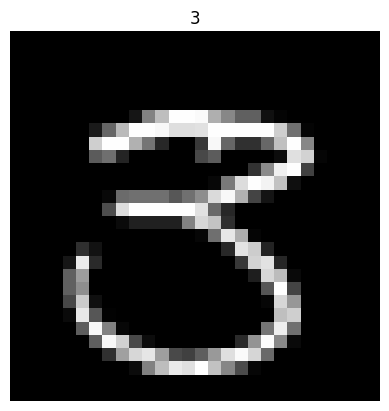

In [7]:
# Plotting X_train 7th record pixels which is 3 in this case
img=X_train.iloc[7].values
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(Y_train.iloc[7])
plt.axis("off")
plt.show()

In [8]:
# Normalization means we are performing grayscale normalizations
# we will divide each pixels values by 255.0


X_train=X_train/255.0
test=test/255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [9]:
X_train=X_train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [10]:
# Label Encoding
from keras.utils import to_categorical #convert to one hot-encoding
Y_train=to_categorical(Y_train,num_classes = 10)

In [11]:
# we split the data into train and test sets.
# test size is 10%
# train size is 90%

# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train, test_size=0.1,random_state=2)

print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


In [12]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical #convert to one-hot encoding
from keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


In [13]:
model=Sequential()
# First convulation layer
model.add(Conv2D(filters=8,kernel_size=(5,5),padding='Same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Second Convulation layer
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

# Fully Connected Layer
model.add(Flatten())
# as there are 256 inputs for colors
model.add(Dense(256,activation = "relu"))
model.add(Dropout(0.5))

# as the output will be 10 digits
model.add(Dense(10, activation ="softmax"))

In [15]:
# Define the optimizer
optimizer = Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)

In [16]:
model.compile(optimizer=optimizer, loss ="categorical_crossentropy", metrics=["accuracy"])

In [17]:
#  Data Augumentation
# Artificially increasing the size of data.i.e we are gussing the dta might be rotated a bit or might be enlarged.. so we are gusessing all these possibibilites and then applying it increase the datasize
datagen=ImageDataGenerator(featurewise_center=False,#set input mean to 0 over the dataset
                           samplewise_center=False,#set each sample mean to 0
                           featurewise_std_normalization=False,#divide in puts by std of the dataset
                           samplewise_std_normalization=False,#divide each input by its std
                           zca_whitening=False, # dimension reduction
                           rotation_range=5,#randomly rotate iimages in the rage of 5 degrees
                           zoom_range=0.1, #randomly shift images horizontally 10%
                           height_shift_range=0.1, # randomly shift images vertically 10%
                           horizontal_flip=False,#randomly flip images
                           vertical_flip=False) #randomly flip images
datagen.fit(X_train)

In [18]:
epochs=10
batch_size=250

In [22]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 12s 78ms/step - loss: 0.2749 - accuracy: 0.9150 - val_loss: 0.1099 - val_accuracy: 0.9638
Epoch 2/10
151/151 [==============================] - 11s 76ms/step - loss: 0.2207 - accuracy: 0.9314 - val_loss: 0.0895 - val_accuracy: 0.9707
Epoch 3/10
151/151 [==============================] - 12s 76ms/step - loss: 0.1902 - accuracy: 0.9410 - val_loss: 0.0745 - val_accuracy: 0.9750
Epoch 4/10
151/151 [==============================] - 11s 75ms/step - loss: 0.1713 - accuracy: 0.9474 - val_loss: 0.0668 - val_accuracy: 0.9779
Epoch 5/10
151/151 [==============================] - 11s 71ms/step - loss: 0.1560 - accuracy: 0.9525 - val_loss: 0.0636 - val_accuracy: 0.9783
Epoch 6/10
151/151 [==============================] - 11s 75ms/step - loss: 0.1471 - accuracy: 0.9546 - val_loss: 0.0586 - val_accuracy: 0.9824
Epoch 7/10
151/151 [==============================] - 11s 73ms/step - loss: 0.1342 - accuracy: 0.9579 - val_loss: 0.0492 - val_accuracy:

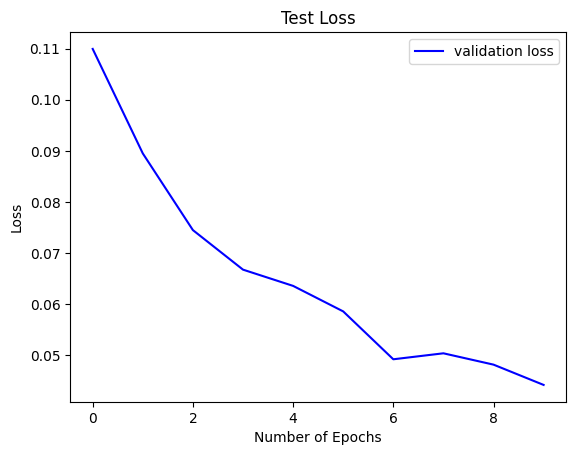

In [23]:
# Plot the loss and accuracy curves for training and validation
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

132/132 [==============================] - 1s 4ms/step


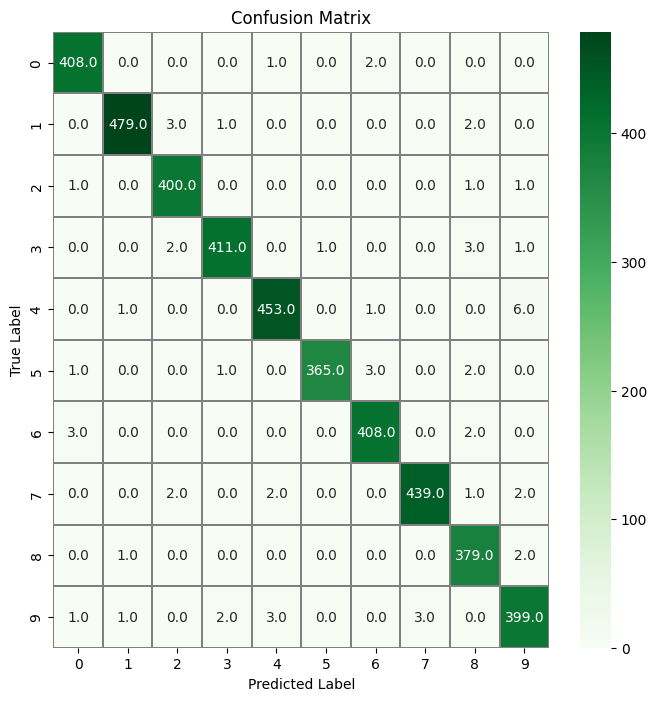

In [24]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()